In [8]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('../data/train.csv')
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

age_mean = df['Age'].mean()

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

numeric_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']
categorical_features = ['Sex', 'Embarked']

preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numeric_features),
    ('cat', OneHotEncoder(), categorical_features)
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())
])

In [14]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 628 to 287
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    object 
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 11.2+ KB


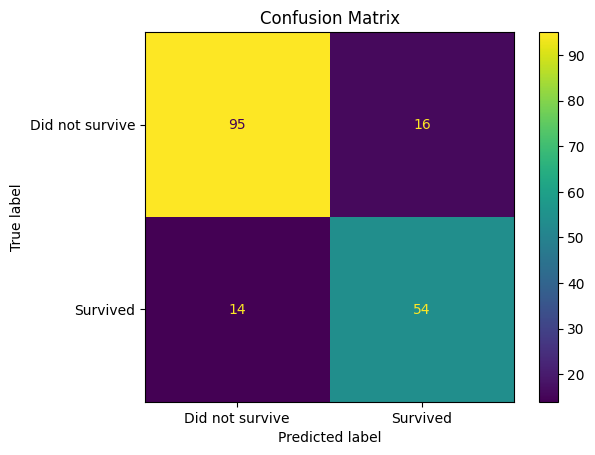

In [11]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Did not survive', 'Survived']).plot()
plt.title('Confusion Matrix')
plt.savefig('../results/graphs/ConfusionMatrix.jpg', format='jpg', dpi=300)
plt.show()

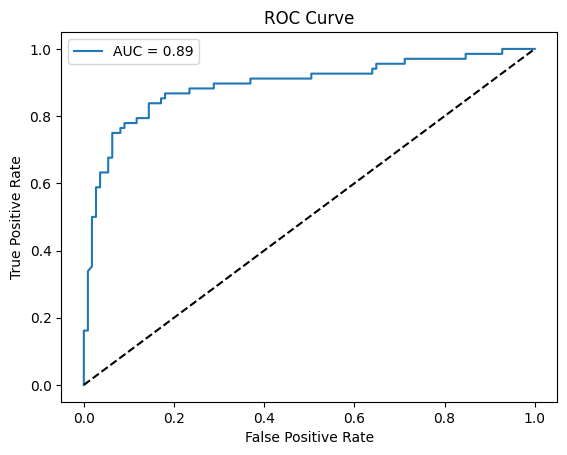

In [12]:
y_prob = pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig('../results/graphs/ROC_Curve.jpg', format='jpg', dpi=300)
plt.show()

In [21]:
new_df = pd.read_csv('../data/test.csv')
passenger_ids = new_df['PassengerId']

new_df = new_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
new_df['Age'] = new_df['Age'].fillna(age_mean)
new_df['Fare'] = new_df['Fare'].fillna(new_df['Fare'].mean())

X_new = new_df
y_new_pred = pipeline.predict(X_new)

result = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': y_new_pred
})

print(result.head())
result.to_csv('../results/prediction/prediction.csv', index=False)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
